# Entrenamiento de una Red Neoronal (Perceptron) - Aplicada a la Ing. Civil

## 1. UCI Concrete Compressive Strength (📊 data)

**Definicion del problema**

*Data Set: UCI Concrete Comprenssive Stregth* link: https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

La Base de datos contiene 1030 datos de mescla de concreto y las variables(features) son:

Variables de Entrada (Features) y Variable Objetivo (Target):.

- Cemento (kg/m³): Material cementicio principal
- Escoria (kg/m³): Subproducto siderúrgico, mejora durabilidad
- Cenizas (kg/m³): Subproducto de plantas térmicas, reduce permeabilidad
- Agua (kg/m³): Necesaria para hidratación del cemento
- Superplastificante (kg/m³): Aditivo que mejora trabajabilidad
- Agregado Grueso (kg/m³): Grava o piedra triturada
- Agregado Fino (kg/m³): Arena
- Edad (días): Tiempo de curado desde el vaciado
- **Resistencia a compresion (MPa): Capacidad del concreto para resistir carga**


In [68]:
# !pip install numpy pandas scipy seaborn matplotlib -q

### <img alt="pagakes" src="https://pypi.org/static/images/white-cube.2351a86c.svg" width="1.5%"/> Importacion de Librerias, clases, funciones, constantes, etc.

In [69]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

# Machine Learning
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Para la persistencia de datos entrenados
import joblib

In [70]:
#  Configuracion de graficos
plt.style.use('default') # seaborn-v0.8
# plt.set_palette('deep')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

<h3> 1. <svg xmlns="http://www.w3.org/2000/svg" width="20" height="20" fill="currentColor" class="bi bi-cloud-arrow-up-fill" viewBox="0 0 16 16">
  <path d="M8 2a5.53 5.53 0 0 0-3.594 1.342c-.766.66-1.321 1.52-1.464 2.383C1.266 6.095 0 7.555 0 9.318 0 11.366 1.708 13 3.781 13h8.906C14.502 13 16 11.57 16 9.773c0-1.636-1.242-2.969-2.834-3.194C12.923 3.999 10.69 2 8 2m2.354 5.146a.5.5 0 0 1-.708.708L8.5 6.707V10.5a.5.5 0 0 1-1 0V6.707L6.354 7.854a.5.5 0 1 1-.708-.708l2-2a.5.5 0 0 1 .708 0z"/>
</svg> Carga y preparacion de datos (data) </h3>

In [71]:
data = pd.read_csv('data/Concrete_Data.csv', sep=';')
display( data.head(5) )

data = data.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)': 'cemento',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'escoria',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'cenizas',
    'Water  (component 4)(kg in a m^3 mixture)': 'agua',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'superplastificante',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'agregado_grueso',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'agregado_fino',
    'Age (day)': 'edad',
    'Concrete compressive strength(MPa, megapascals) ': 'resistencia_compresion_concreto',
    })
# data = data.drop(columns=['N° Radiografía', 'Sexo'], axis=1)
display( data )

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


,cemento,escoria,cenizas,agua,superplastificante,agregado_grueso,agregado_fino,edad,resistencia_compresion_concreto
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


<h3> <svg xmlns="http://www.w3.org/2000/svg" width="20" height="20" fill="currentColor" class="bi bi-calculator" viewBox="0 0 16 16">
  <path d="M12 1a1 1 0 0 1 1 1v12a1 1 0 0 1-1 1H4a1 1 0 0 1-1-1V2a1 1 0 0 1 1-1zM4 0a2 2 0 0 0-2 2v12a2 2 0 0 0 2 2h8a2 2 0 0 0 2-2V2a2 2 0 0 0-2-2z"/>
  <path d="M4 2.5a.5.5 0 0 1 .5-.5h7a.5.5 0 0 1 .5.5v2a.5.5 0 0 1-.5.5h-7a.5.5 0 0 1-.5-.5zm0 4a.5.5 0 0 1 .5-.5h1a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5h-1a.5.5 0 0 1-.5-.5zm0 3a.5.5 0 0 1 .5-.5h1a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5h-1a.5.5 0 0 1-.5-.5zm0 3a.5.5 0 0 1 .5-.5h1a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5h-1a.5.5 0 0 1-.5-.5zm3-6a.5.5 0 0 1 .5-.5h1a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5h-1a.5.5 0 0 1-.5-.5zm0 3a.5.5 0 0 1 .5-.5h1a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5h-1a.5.5 0 0 1-.5-.5zm0 3a.5.5 0 0 1 .5-.5h1a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5h-1a.5.5 0 0 1-.5-.5zm3-6a.5.5 0 0 1 .5-.5h1a.5.5 0 0 1 .5.5v1a.5.5 0 0 1-.5.5h-1a.5.5 0 0 1-.5-.5zm0 3a.5.5 0 0 1 .5-.5h1a.5.5 0 0 1 .5.5v4a.5.5 0 0 1-.5.5h-1a.5.5 0 0 1-.5-.5z"/>
</svg> 2. Pre-Calculos de la data </h3>

In [72]:
# print(f"variables: {data.columns.tolist()}")
# print()
print(f"tipos de datos:\n{data.dtypes}\n")

print(f"Valores nulos por columna:\n{data.isnull().sum()}\n")

tipos de datos:
cemento                            float64
escoria                            float64
cenizas                            float64
agua                               float64
superplastificante                 float64
agregado_grueso                    float64
agregado_fino                      float64
edad                                 int64
resistencia_compresion_concreto    float64
dtype: object

Valores nulos por columna:
cemento                            0
escoria                            0
cenizas                            0
agua                               0
superplastificante                 0
agregado_grueso                    0
agregado_fino                      0
edad                               0
resistencia_compresion_concreto    0
dtype: int64



In [73]:
print(f"forma de la data: {data.shape}\n")

print(f"ESTADISTICAS DESCRIPTIVAS:\n")
data.describe().round(2)

forma de la data: (1030, 9)

ESTADISTICAS DESCRIPTIVAS:



,cemento,escoria,cenizas,agua,superplastificante,agregado_grueso,agregado_fino,edad,resistencia_compresion_concreto
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.44
75%,350.00,142.95,118.30,192.00,10.20,1029.40,824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


In [74]:
def plot_distribution_data(data):
    fig, axes = plt.subplots(
        nrows=3, 
        ncols=3, 
        figsize=(16, 12)
        )
    axes = axes.ravel()  # Flatten the axes array for easy iteration

    for i, column in enumerate(data.columns):
        axes[i].hist(data[column], bins=30, edgecolor='black', color="skyblue", alpha=0.7)
        # sns.histplot(data[column], kde=True, stat="count", bins=30, color='skyblue', edgecolor='black', ax=axes[i])
        # sns.kdeplot(data[column], color='red', ax=axes[i])
        axes[i].set_title(f'Distribución de {column}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frecuencia')
        # Agregamos estadisticas basicas
        mean_value = data[column].mean()
        median_value = data[column].median()
        axes[i].axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
        axes[i].axvline(median_value, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
        axes[i].legend(fontsize=8)
        axes[i].grid(True)
    plt.tight_layout()
    plt.show()

def plot_boxplot_data(data):
    fig, axes = plt.subplots(
        nrows=3, 
        ncols=3, 
        figsize=(16, 12)
        )
    axes = axes.ravel()  # Flatten the axes array for easy iteration

    for i, column in enumerate(data.columns):
        box_data = axes[i].boxplot(data[column], vert=True, patch_artist=True, 
                                       boxprops=dict(facecolor='lightblue', color='black'),
                                       medianprops=dict(color='red'),
                                       whiskerprops=dict(color='black'),
                                       capprops=dict(color='black'),
                                       flierprops=dict(markerfacecolor='red', marker='o'))
        # sns.boxplot(x=data[column], ax=axes[i])
        axes[i].set_title(f'Boxplot de {column}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(column)
        axes[i].grid(True, alpha=0.7)

        # Calcular y mostrar informacion de outliers
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q1 + 1.5 * IQR
        outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]
        if not outliers.empty or len(outliers) > 0:
            axes[i].text(0.05, 0.95, f'Outliers: {len(outliers)}', transform=axes[i].transAxes,
                         fontsize=12, verticalalignment='top', bbox=dict(facecolor='green', alpha=0.5))

    plt.tight_layout()
    plt.show()

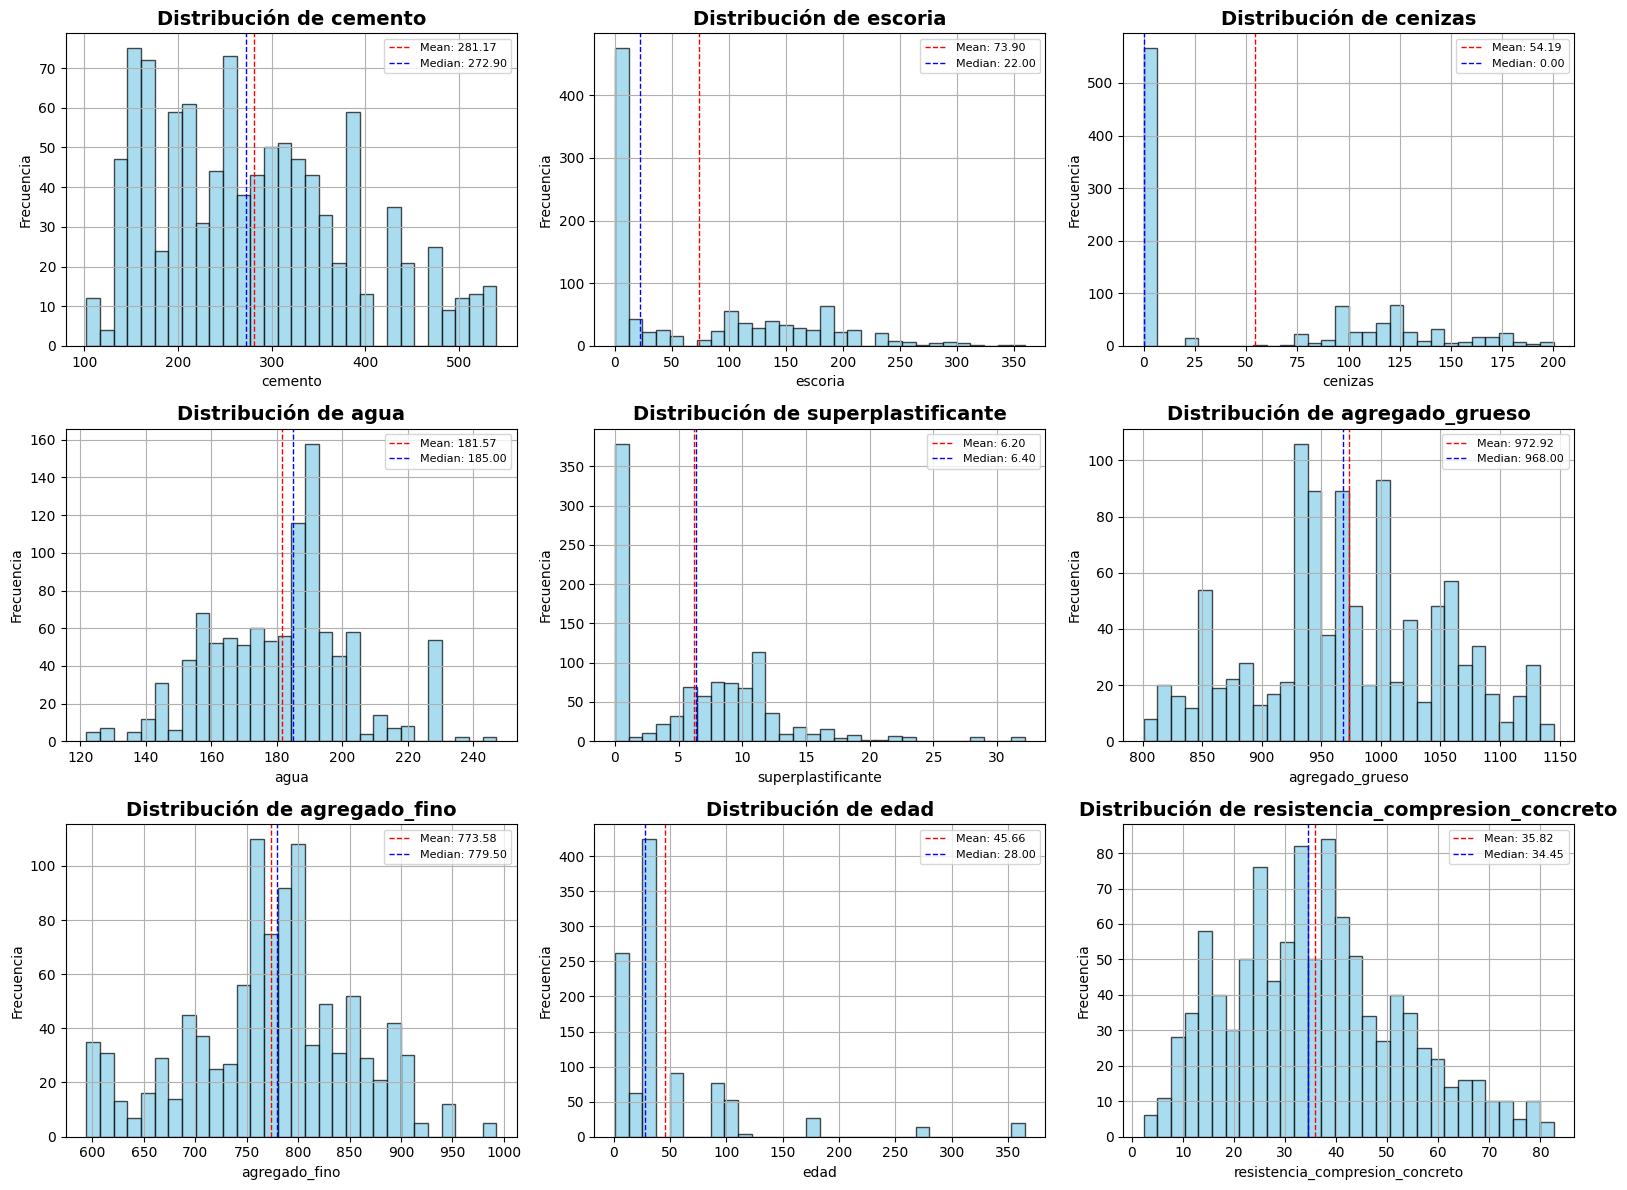

In [75]:
plot_distribution_data(data)

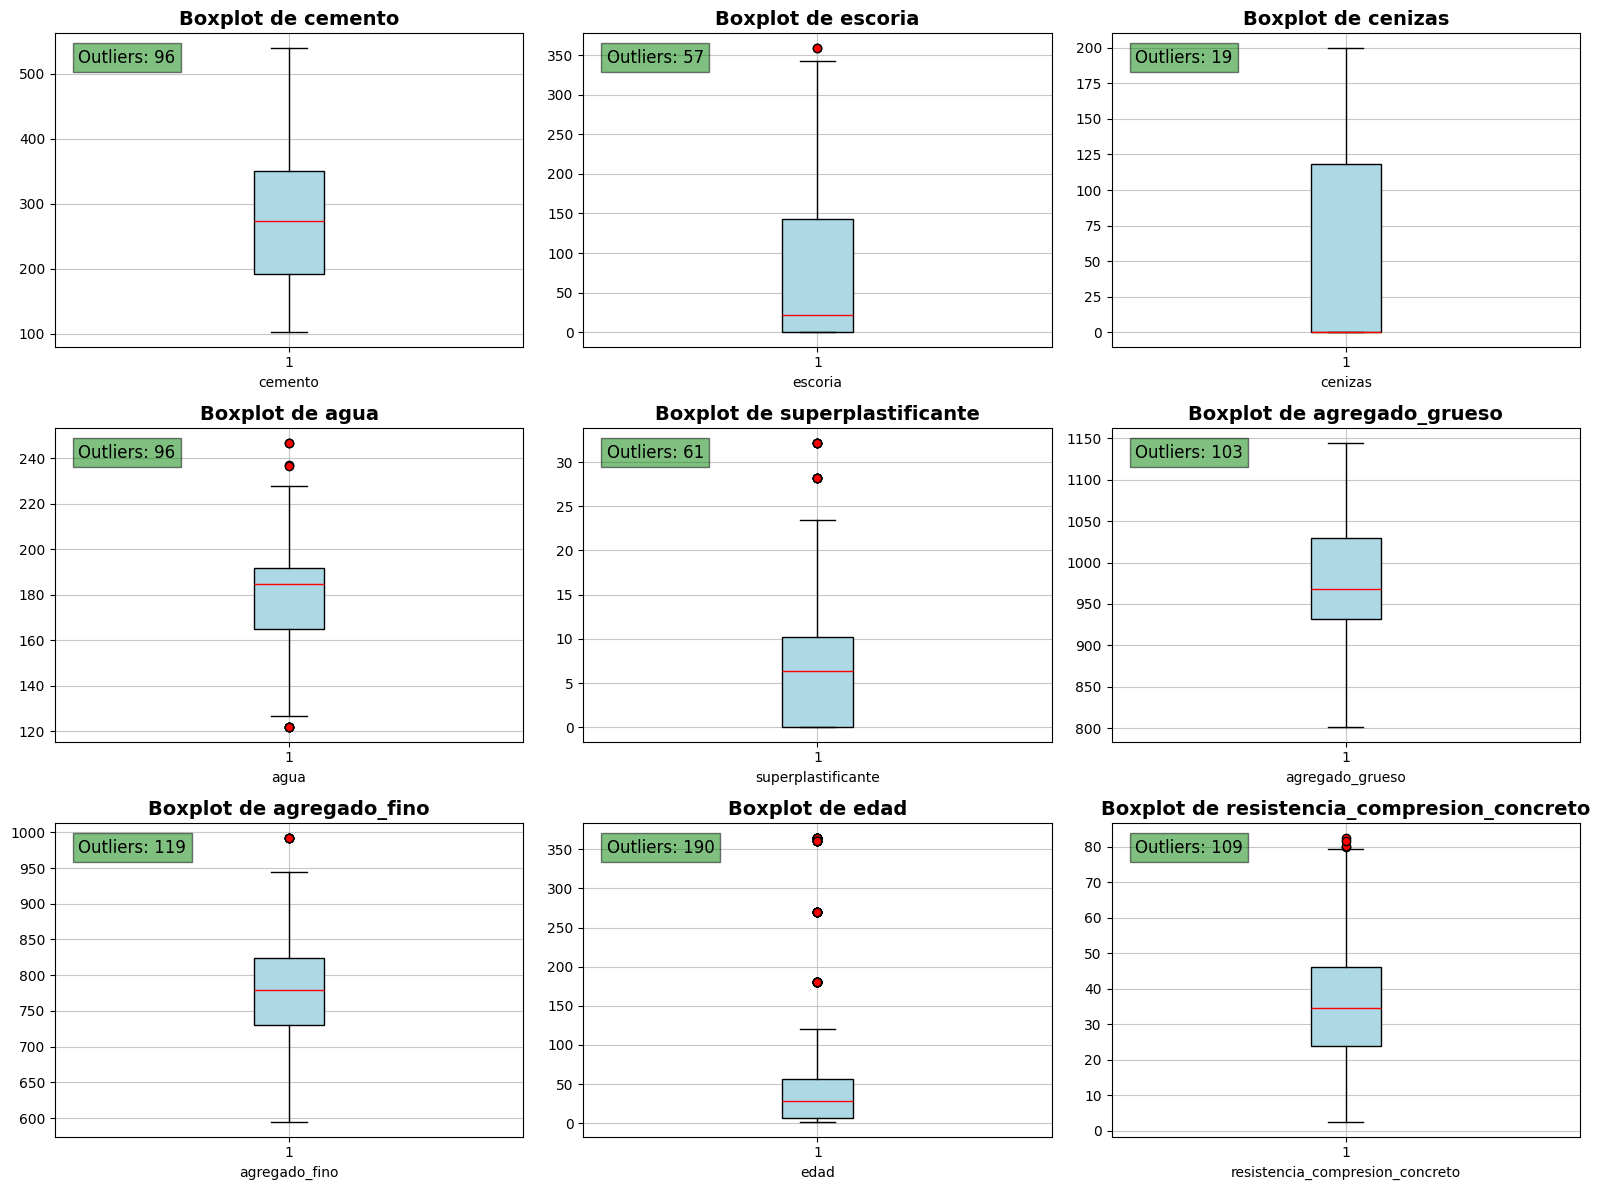

In [76]:
plot_boxplot_data(data)

### 🔗 3. Matriz de correlación

In [77]:
def plot_correlation_matrix(data):
    plt.figure(
        figsize=(16, 10)
        )
    
    # Calculamos la matriz de correlación - 'pearson', 'spearman', 'kendall'
    corr = data.corr()
    # Crear una máscara para la parte superior de la matriz
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Crear heatmap
    sns.heatmap(
        corr, 
        mask=mask, 
        annot=True, 
        fmt=".2f", 
        cmap='coolwarm', 
        vmax=1, 
        vmin=-1,
        square=True, 
        cbar_kws={"shrink": .8}
        )
    
    plt.title('Matriz de Correlación entre Variables', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('03_correlacion.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_scatter_relationsships(data):
    fig, axes = plt.subplots(
        nrows=2, 
        ncols=4, 
        figsize=(16, 12)
        )
    axes = axes.ravel()  # Flatten the axes array for easy iteration
    
    features = [col for col in data.columns if col != 'resistencia_compresion_concreto']
    for i, feature in enumerate(features):
        # plot scatter
        # axes[i].scatter(data[feature], data['resistencia_compresion_concreto'], alpha=0.6)
        sns.regplot(data=data, x=data[feature], y=data['resistencia_compresion_concreto'], ax=axes[i], scatter_kws={"s": 15}, line_kws={"color": "red"})
        # sns.scatterplot(x=data['resistencia_compresion_concreto'], y=data[feature], alpha=0.6)
        axes[i].set_title(f'resistencia_compresion_concreto vs {feature}', fontsize=8, fontweight='bold')
        # axes[i].set_xlabel('resistencia_compresion_concreto')
        axes[i].set_ylabel(feature)
        axes[i].grid(True, alpha=0.7)
        # Linea de tendencia
        z = np.polyfit(data[feature], data['resistencia_compresion_concreto'], 1)
        p = np.poly1d(z)
        axes[i].plot(data[feature], p(data[feature]), color='red', linestyle='dashed', linewidth=1, label='Tendencia')
        # Correlación - 'pearson', 'spearman', 'kendall'
        corr = data[[feature, 'resistencia_compresion_concreto']].corr(method='spearman').iloc[0, 1]
        axes[i].text(0.05, 0.95, f'Correlación: {corr:.2f}', transform=axes[i].transAxes, 
                     fontsize=12, verticalalignment='top', bbox=dict(facecolor='yellow', alpha=0.5))

    plt.tight_layout()
    plt.show()

In [78]:
# data = data.drop(columns=['Edad'], axis=1)
# display( data.head(5) )

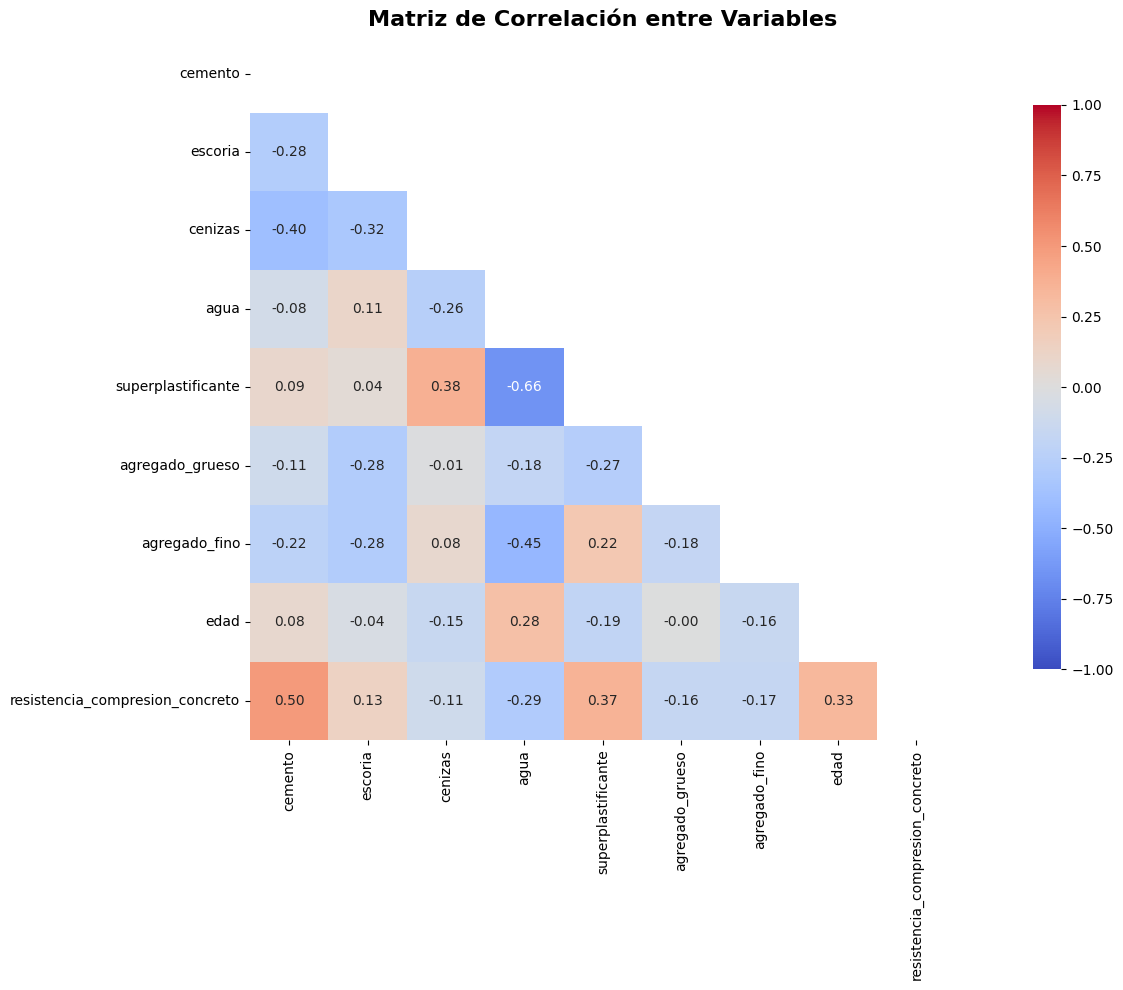

In [79]:
plot_correlation_matrix(data)

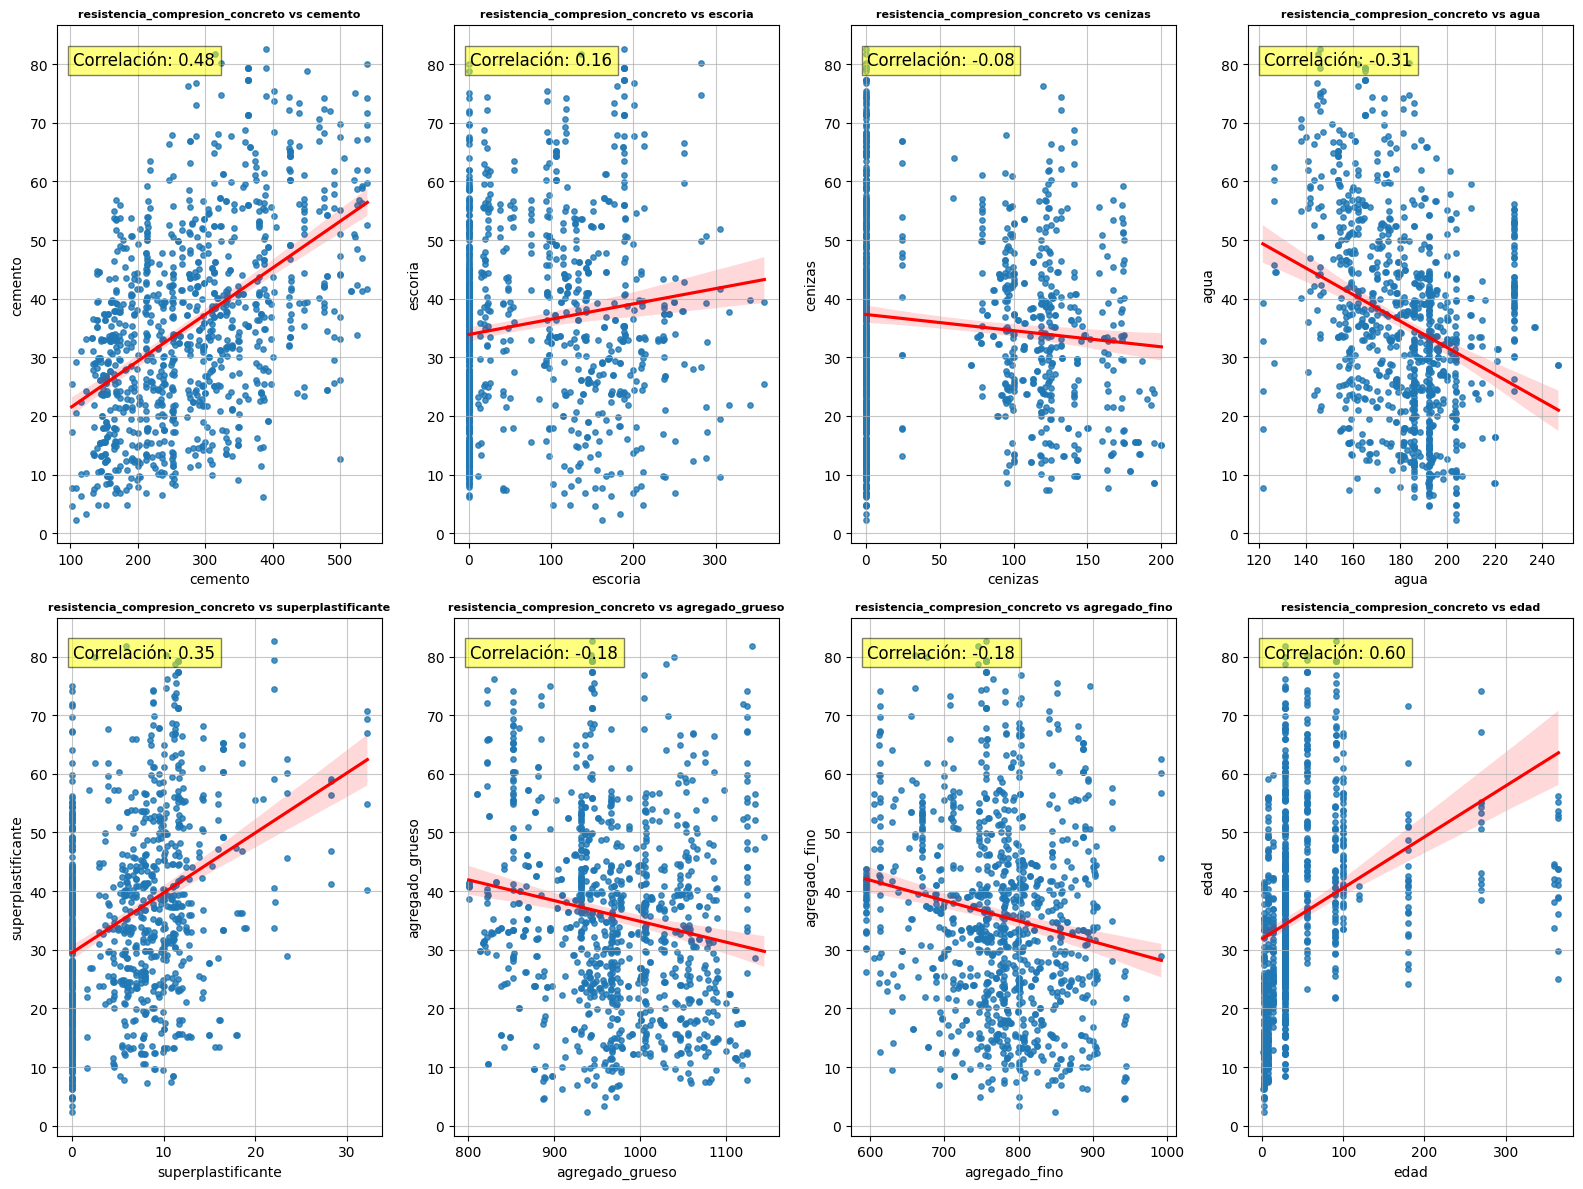

In [80]:
plot_scatter_relationsships(data)

### 🔧 4. Preprocesamiento y Arquitectura de Modelo

🎯 **Objetivo del procesamiento**
```
Limpiar datos: remover variables calculadas temporales , 
dividir datos:  train/test split estratificado 
Normalizar fiatures: Preparar datos para redes neoronales,
Validar integridad: Asegurar cosistencia de Nombres
```

📊 **Preparacion de datos para modelado**
```
consistencia: los modelos necesitan en formato especifico
escalas: variables con diferentes rangos pueden dominar el aprendisaje
Generalizacion: Split adecuado previene overfitting
Reproducibilidad: Semillas o fijas para resultados consistentes
```

🧠 **¿Porque se normaliza en redes neoronales?**

Normalizar es el proceso para escalar los datos a una distribucion controlada y esto biene de la estadistica.
ejejmplo: sigma(0,1)

🎯 **Beneficios de la normalizacion**
- *Entrenamiento mas rapido y estable*  
   Mejora el rendimiento de desenso de gradiente
- *Evita que una carateristica domine a otra*  
   todas las entradas deben tener la misma importanciarelativa
- *Mejora la convergencia*  
  Permite llegar a soluciones óptimas mas rapidas
- *Reduce errores numericos*
  Previene errores grandes o pequeñas

In [90]:
def prepare_data(data):
    target_column = 'resistencia_compresion_concreto'


    # Separar las características y la variable objetivo
    XX = data.drop(columns=[target_column], axis=1)
    y = data[target_column]

    fiature_names = XX.columns.tolist()

    print(f" Features (X): {XX.shape}")
    print(f" Target (y): {y.shape}")
    print(f" Feature names: {fiature_names}\n")

    # Binning the target variable into 5 categories
    y_binned = pd.cut(
        y, 
        bins=5, # Dividir en 5 categorías o frecuencias
        labels=False
        ) 
    
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        XX, y, 
        test_size=0.2, # 20% de los datos para prueba
        train_size=0.8, # 80% de los datos para entrenamiento
        random_state=42, 
        stratify=y_binned)

    print(f" Training set shape: {X_train.shape[0]}, sample {y_train.shape[0]/(len(XX))*100:.2f}%")
    print(f" Test set shape: {X_test.shape[0]}, {y_test.shape[0]/len(XX)*100:.2f}%\n")
    
    # Escalar las características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return (X_train_scaled, X_test_scaled, y_train, y_test, scaler, fiature_names)

X_train_scaled, X_test_scaled, y_train, y_test, scaler, fiature_names = prepare_data(data)


 Features (X): (1030, 8)
 Target (y): (1030,)
 Feature names: ['cemento', 'escoria', 'cenizas', 'agua', 'superplastificante', 'agregado_grueso', 'agregado_fino', 'edad']

 Training set shape: 824, sample 80.00%
 Test set shape: 206, 20.00%



### 🧠 5. Entrenamiento de la Red Neoronal

<!-- ![image.png](attachment:image.png) -->

In [82]:
print(f"ARQUITECTURA DE LA RED NEURONAL (MLPRegressor)")
print("="*50)

# configuracion de la red neuronal
nn_config = {
    'hidden_layer_sizes': (100, 50, 25), # 3 capas ocultas con 100, 50 y 25 neuronas respectivamente
    'activation': 'relu', # Función de activación
    'solver': 'adam', # Optimizador
    'learning_rate_init': 0.001, # Tasa de aprendizaje inicial
    'max_iter': 1000, # Número máximo de iteraciones
    'random_state': 42, # Semilla para reproducibilidad
    'early_stopping': True, # Detener el entrenamiento si no hay mejora
    'validation_fraction': 0.1, # Fracción de datos para validación
    'n_iter_no_change': 10, # Número de iteraciones sin cambio para detener el entrenamiento
}

print(f"ESTRUCTURA DE CAPAS:\n")
print(f" - Capas de entrada: {len(X_train_scaled[0])} neuronas (una por entrada)")
print(f" - Capas ocultas 1: {nn_config['hidden_layer_sizes'][0]} reuronas + ReLu")
print(f" - Capas ocultas 2: {nn_config['hidden_layer_sizes'][1]} reuronas + ReLu")
print(f" - Capas ocultas 3: {nn_config['hidden_layer_sizes'][2]} reuronas + ReLu")
print(f" - Capas de salida: 1 neurona (regresión continua)")
print(f" - Tasa de aprendizaje inicial: {nn_config['learning_rate_init']}")
print(f" - Número máximo de iteraciones: {nn_config['max_iter']}")

ARQUITECTURA DE LA RED NEURONAL (MLPRegressor)
ESTRUCTURA DE CAPAS:

 - Capas de entrada: 8 neuronas (una por entrada)
 - Capas ocultas 1: 100 reuronas + ReLu
 - Capas ocultas 2: 50 reuronas + ReLu
 - Capas ocultas 3: 25 reuronas + ReLu
 - Capas de salida: 1 neurona (regresión continua)
 - Tasa de aprendizaje inicial: 0.001
 - Número máximo de iteraciones: 1000


### 🏋️ Entrenamiento Red Neuronal

In [83]:
def train_red_neuronal(X_train_scaled, y_train, nn_config):
    print(f"\n🧠 ENTRENANDO RED NEURONAL:")
    print(f"  📊 Datos de entrada (X_train): {X_train_scaled.shape}")
    # Crear el modelo de red neuronal
    model = MLPRegressor(**nn_config) # pasar clave - valor del diccionario nn_config
    
    # Entrenar el modelo
    model.fit(X_train_scaled, y_train)

    print(f"  🔄 Iteraciones ejecutadas: {model.n_iter_}") # ⚙
    
    return model

In [84]:
nn_model = train_red_neuronal(X_train_scaled, y_train, nn_config)


🧠 ENTRENANDO RED NEURONAL:
  📊 Datos de entrada (X_train): (824, 8)
  🔄 Iteraciones ejecutadas: 278


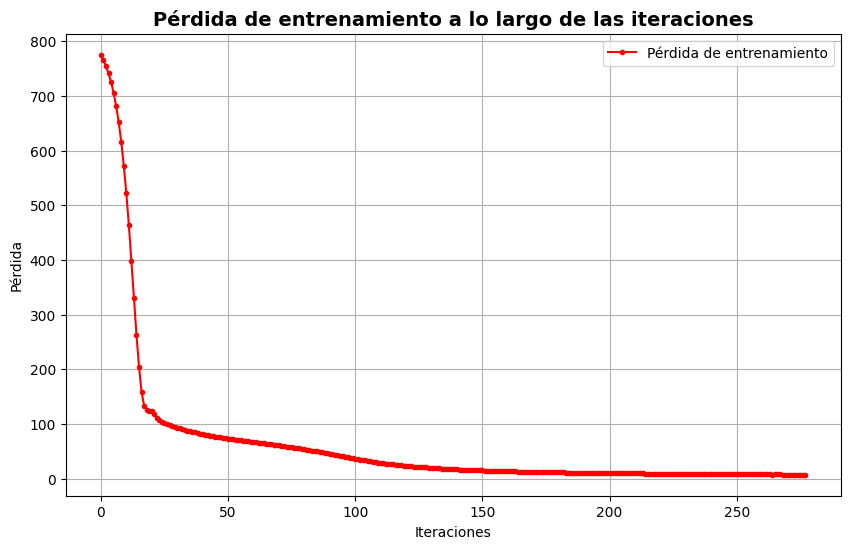

In [85]:
plt.plot(nn_model.loss_curve_, '.-', color='red', label='Pérdida de entrenamiento')
plt.title('Pérdida de entrenamiento a lo largo de las iteraciones', fontsize=14, fontweight='bold')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

### 📏 6. Evaluacion de Modelo y Métricas

#### 1. **RMSE – Root Mean Squared Error**
El RMSE mide el **error cuadrático medio** entre los valores reales y los predichos. Penaliza más los errores grandes (por estar al cuadrado) y se expresa en las mismas unidades que la variable objetivo.


\begin{equation}
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\end{equation}


- $ y_i $: valor real  
- $ \hat{y}_i $: valor predicho  
- $ n $: número de muestras  

#### 2. **MAE – Mean Absolute Error**
El MAE mide el **promedio del valor absoluto de los errores**. Es más robusto frente a valores atípicos (outliers) porque no eleva al cuadrado las diferencias.


\begin{equation}
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\end{equation}


#### 3. **$R^2$ – Coeficiente de Determinación**
$R^2$ indica la **proporción de la variancia** de los valores reales explicada por el modelo. Su rango típico es de 0 a 1 (puede ser negativo si el modelo es muy malo).


\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
\end{equation}


- $ \bar{y} $: media de los valores reales  


In [86]:
def create_model(nn_model, X_test_scaled, y_test):
    print(f"Datos de entrada (X_test): {X_test_scaled.shape}")
    
    # Predecir con el modelo
    y_pred = nn_model.predict(X_test_scaled)
    
    # Calcular métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nRED NEURONAL:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R^2: {r2:.4f}")
    print(f"   • Resistencia de compresión del concreto (y_test): {y_test.mean():.2f} MPa")

    error_percentual = np.abs(rmse / y_test.mean()) * 100
    print(f"   • Error RMSE como % de resistencia promedio: {error_percentual:.1f}%")

    return {"response": 
            {"mae": mae, "rmse": rmse, "r2": r2, "predicted": y_pred}
    }

In [87]:
response = create_model(nn_model, X_test_scaled, y_test)

Datos de entrada (X_test): (206, 8)

RED NEURONAL:
RMSE: 5.3647
MAE: 4.0178
R^2: 0.8995
   • Resistencia de compresión del concreto (y_test): 35.48 MPa
   • Error RMSE como % de resistencia promedio: 15.1%


### 7. Arquitectura Red-Neoronal

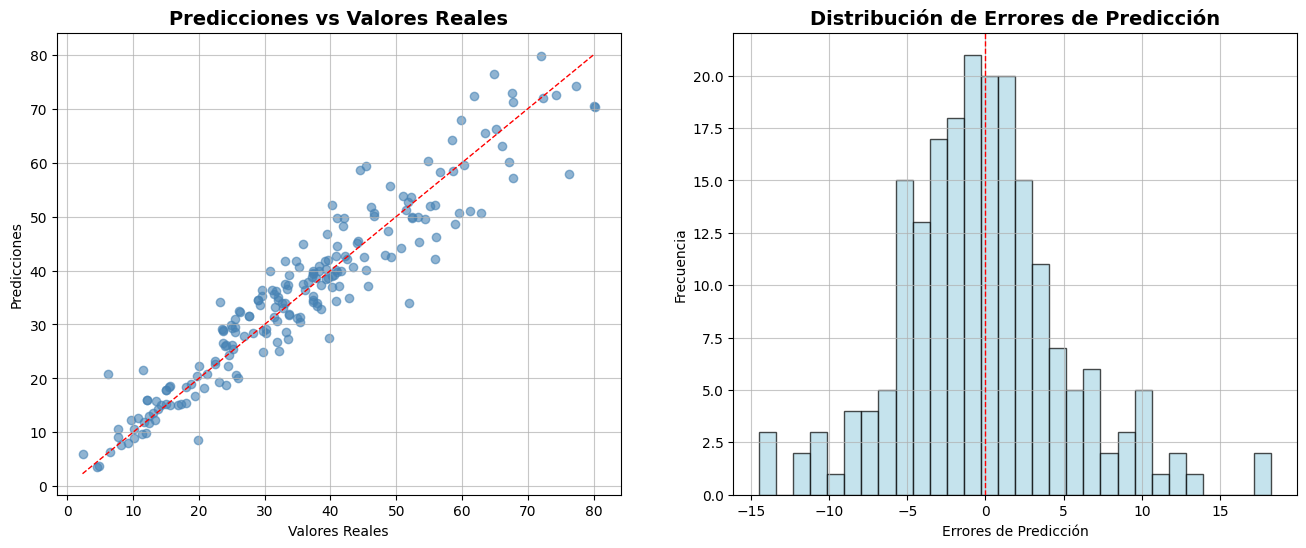

In [88]:
fig, axes =  plt.subplots(1, 2, figsize=(16, 6))

# scaler plot
axes[0].scatter(y_test, response['response']['predicted'], alpha=0.6, color='steelblue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed', linewidth=1, label='Línea de referencia')
axes[0].set_title('Predicciones vs Valores Reales', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Valores Reales')
axes[0].grid(True, alpha=0.7)

nn_errors = y_test - response['response']['predicted']
axes[1].hist(nn_errors, bins=30, color='lightblue', edgecolor='black', alpha=0.7)
axes[1].axvline(0, color='red', linestyle='dashed', linewidth=1, label='Error Cero')
axes[1].set_title('Distribución de Errores de Predicción', fontsize = 14, fontweight='bold')
axes[1].set_xlabel('Errores de Predicción')
axes[0].set_ylabel('Predicciones')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, alpha=0.7)  

### 🤔 8. Save data model entraned

In [97]:
def save_neural_network_model(nn_model, scaler, feature_names):
    # GUARDAR EL MODELO ENTRENADO
    joblib.dump(nn_model, 'outputs/red_neuronal_modelo.pkl')
    print(f"Modelo guardado: 'outputs/red_neuronal_modelo.pkl'")
    
    # GUARDAR EL SCALER
    joblib.dump(scaler, 'outputs/scaler_normalizacion.pkl')
    print(f"Scaler guardado: 'outputs/scaler_normalizacion.pkl'")
    
    # GUARDAR NOMBRES DE VARIABLES
    joblib.dump(feature_names, 'outputs/nombres_variables.pkl')
    print(f"Variables guardadas: 'outputs/nombres_variables.pkl'")
    
    # GUARDAR METADATOS DEL MODELO
    metadatos = {
        'arquitectura': nn_model.hidden_layer_sizes,
        'activacion': nn_model.activation,
        'optimizador': nn_model.solver,
        'iteraciones': nn_model.n_iter_,
        'perdida_final': nn_model.loss_,
        'fecha_entrenamiento': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
    }
    
    joblib.dump(metadatos, 'outputs/metadatos_modelo.pkl')
    print(f"Metadatos guardados: 'outputs/metadatos_modelo.pkl'")
    
    
    return metadatos

# Guardar modelo completo
metadatos = save_neural_network_model(nn_model, scaler, fiature_names)

Modelo guardado: 'outputs/red_neuronal_modelo.pkl'
Scaler guardado: 'outputs/scaler_normalizacion.pkl'
Variables guardadas: 'outputs/nombres_variables.pkl'
Metadatos guardados: 'outputs/metadatos_modelo.pkl'


### 9. Validacion y consulta al modelo entrenado

In [99]:
def verificar_modelo_guardado():
    print(f"\n🧪 VERIFICANDO MODELO GUARDADO:")
    print("="*35)
    
    try:
        # Cargar componentes
        modelo_cargado = joblib.load('outputs/red_neuronal_modelo.pkl')
        scaler_cargado = joblib.load('outputs/scaler_normalizacion.pkl')
        
        # Hacer predicción de prueba
        ejemplo_datos = [320, 0, 0, 180, 0, 950, 750, 28]
        ejemplo_normalizado = scaler_cargado.transform([ejemplo_datos])
        prediccion = modelo_cargado.predict(ejemplo_normalizado)[0]
        
        print(f"Predicción de prueba: {prediccion:.1f} MPa")
                
    except Exception as e:
        print(f"❌ Error: {e}")

verificar_modelo_guardado()


🧪 VERIFICANDO MODELO GUARDADO:
Predicción de prueba: 33.1 MPa


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Referencias

<!-- - (video): https://youtu.be/tCPFqDF9B5I -->
- www.efraciv.dev